### Introduction
When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.<br/> 
There are several different terms for binning including bucketing, discrete binning, discretization or quantization.<br/> 
Pandas supports these approaches using the cut and qcut functions.

## Binning Data with Pandas cut and qcut

In [1]:
import pandas as pd
import numpy as np
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing 
#attractive and informative statistical graphics.
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\kunal95\\Documents\\Implementation of different concepts during model building\\Binning'

In [3]:
raw_df = pd.read_excel('C://Users//kunal95//Documents//Implementation of different concepts during model building//Binning//2018_Sales_Total_v2.xlsx')
raw_df

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55
...,...,...,...,...,...,...,...
1502,424914,White-Trantow,B1-69924,37,42.77,1582.49,2018-11-27 14:29:02
1503,424914,White-Trantow,S1-47412,16,65.58,1049.28,2018-12-19 15:15:41
1504,424914,White-Trantow,B1-86481,75,28.89,2166.75,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,1915.00,2018-12-22 03:31:36


In [4]:
raw_df.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [5]:
raw_df.isnull().sum()

account number    0
name              0
sku               0
quantity          0
unit price        0
ext price         0
date              0
dtype: int64

In [6]:
raw_df

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55
...,...,...,...,...,...,...,...
1502,424914,White-Trantow,B1-69924,37,42.77,1582.49,2018-11-27 14:29:02
1503,424914,White-Trantow,S1-47412,16,65.58,1049.28,2018-12-19 15:15:41
1504,424914,White-Trantow,B1-86481,75,28.89,2166.75,2018-12-29 13:03:54
1505,424914,White-Trantow,S1-82801,20,95.75,1915.00,2018-12-22 03:31:36


In [7]:
df = raw_df

In [8]:
df['account number'].value_counts()

424914    107
218895     94
714466     94
412290     89
740150     82
729833     82
737550     81
146832     79
383080     74
688981     74
642753     73
672390     73
239344     72
786968     72
527099     71
257198     67
307599     64
141962     55
163416     53
604255     51
Name: account number, dtype: int64

In [9]:
df['name'].value_counts()

White-Trantow                      107
Kulas Inc                           94
Trantow-Barrows                     94
Jerde-Hilpert                       89
Koepp Ltd                           82
Barton LLC                          82
Fritsch, Russel and Anderson        81
Kiehn-Spinka                        79
Will LLC                            74
Keeling LLC                         74
Pollich LLC                         73
Kuhn-Gusikowski                     73
Stokes LLC                          72
Frami, Hills and Schmidt            72
Sanford and Sons                    71
Cronin, Oberbrunner and Spencer     67
Kassulke, Ondricka and Metz         64
Herman LLC                          55
Purdy-Kunde                         53
Halvorson, Crona and Champlin       51
Name: name, dtype: int64

In [10]:
df['name'].nunique()

20

In [11]:
df['account number'].nunique()

20

In [12]:
#grouped_df = df.groupby(['account number','name'])
#for key,item in grouped_df:
#    print(grouped_df.get_group(key))

In [13]:
grouped_df = df.groupby(['account number','name'])['ext price'].sum().reset_index()

In [14]:
grouped_df

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,184793.70


In [15]:
df = grouped_df

**A histogram is an example of binning data and showing the visual representation of the data distribution.**

<AxesSubplot:ylabel='Frequency'>

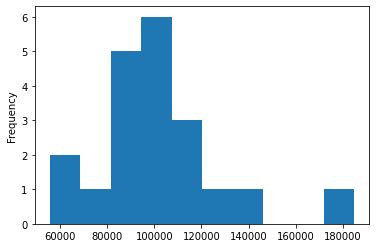

In [16]:
df['ext price'].plot(kind='hist') #the number of customers that have sales within certain ranges

**There are 8 bins with data. What if we wanted to divide our customers into 3, 4 or 5 groupings?<br/>**
**That’s where pandas qcut and cut come into play.** 

## qcut

The pandas documentation describes qcut as a **“Quantile-based discretization function.”** This basically means that qcut<br/> 
tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based<br/> 
on the distribution of the data, not the actual numeric edges of the bins.

In [17]:
df['ext price'].describe() #how data can be cut by percentiles

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

In [18]:
df['quantile_ex_1']=pd.qcut(df['ext price'],q=4)     #Assigning the results back to the original dataframe
df['quantile_ex_2']=pd.qcut(df['ext price'],q=10,precision=0) #precision to define how many decimal points to use for calculating the bin precision.

#qcut is to define the number of quantiles and let pandas figure out how to divide up the data.
#Here,pandas create 4 equal sized groupings of the data.

In [19]:
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [20]:
df['quantile_ex_1'].value_counts() #how the values are distributed across the bins

(110132.552, 184793.7]             5
(100271.535, 110132.552]           5
(89137.708, 100271.535]            5
(55733.049000000006, 89137.708]    5
Name: quantile_ex_1, dtype: int64

In [21]:
df['quantile_ex_2'].value_counts()

(124778.0, 184794.0]    2
(112290.0, 124778.0]    2
(105938.0, 112290.0]    2
(103606.0, 105938.0]    2
(100272.0, 103606.0]    2
(95908.0, 100272.0]     2
(90686.0, 95908.0]      2
(87168.0, 90686.0]      2
(76471.0, 87168.0]      2
(55732.0, 76471.0]      2
Name: quantile_ex_2, dtype: int64

**One challenge with this approach is that the bin labels are not very easy to explain to an end user.<br/>** 
**For instance, if we wanted to divide our customers into 5 groups like an airline frequent flier approach,<br/>** 
**we can explicitly label the bins to make them easier to interpret.**

In [23]:
bin_labels_5 = ['Bronze','Silver','Gold','Platinum','Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                             q=[0,.2,.4,.6,.8,1],
                             labels=bin_labels_5)
df.head(10)

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]",Silver
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]",Platinum
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 184793.7]","(112290.0, 124778.0]",Diamond
9,424914,White-Trantow,184793.70,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond


In [24]:
df['quantile_ex_3'].value_counts() #we now have an equal distribution of customers across the 5 bins 

Diamond     4
Platinum    4
Gold        4
Silver      4
Bronze      4
Name: quantile_ex_3, dtype: int64

When using qcut the quantiles **must all be less than 1**. Here are some examples of distributions.<br/> 
In most cases it’s simpler to just define q as an integer:<br/>

terciles: q=[0, 1/3, 2/3, 1] or q=3<br/>
quintiles: q=[0, .2, .4, .6, .8, 1] or q=5<br/>
sextiles: q=[0, 1/6, 1/3, .5, 2/3, 5/6, 1] or q=6

In [25]:
# what ranges are used to identify the different bins?
results, bin_edges = pd.qcut(df['ext price'],
                             q=[0,.2,.4,.6,.8,1],
                             labels=bin_labels_5,
                             retbins=True)                #retbins=True to return the bin labels

result_table = pd.DataFrame(zip(bin_edges,bin_labels_5),
                            columns=['Threshold','Tier'])

In [26]:
result_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [27]:
df.describe(include='category')   #useful and also a good summary of how qcut works.

,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
freq,5,2,4


In [28]:
#To define our percentiles using the same format we used for qcut :

df.describe(percentiles=[0, 1/3, 2/3, 1])

#1-> 0% will be the same as the min.
#2-> 100% will be same as the max. 
#3-> 50th percentile will always be included, regardless of the values passed.

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,101711.287500
std,231499.208970,27037.449673
min,141962.000000,55733.050000
0%,141962.000000,55733.050000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,184793.700000
max,786968.000000,184793.700000


**one more potential way that we can label our bins. Instead of the bin ranges or custom labels,<br/>**
**we can return integers by passing labels=False.**

In [30]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                             q=[0,.2,.4,.6,.8,1],
                             labels=False,
                             precision=0)
df.head(10)

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1
5,257198,"Cronin, Oberbrunner and Spencer",89734.55,"(89137.708, 100271.535]","(87168.0, 90686.0]",Silver,1
6,307599,"Kassulke, Ondricka and Metz",86451.07,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
7,383080,Will LLC,104437.60,"(100271.535, 110132.552]","(103606.0, 105938.0]",Platinum,3
8,412290,Jerde-Hilpert,112591.43,"(110132.552, 184793.7]","(112290.0, 124778.0]",Diamond,4
9,424914,White-Trantow,184793.70,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4


## cut

**The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data<br/>
in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.**<br/>

**On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of<br/>
items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are<br/> in a single bin.**<br/>

**For a frequent flier program, 25,000 miles is the silver level and that does not vary based on year to year variation of<br/> 
the data. If we want to define the bin edges (25,000 - 50,000, etc) we would use cut . We can also use cut to define bins<br/> 
that are of constant size.**

In [31]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4']) #for simplicity

In [32]:
df

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92
5,257198,"Cronin, Oberbrunner and Spencer",89734.55
6,307599,"Kassulke, Ondricka and Metz",86451.07
7,383080,Will LLC,104437.60
8,412290,Jerde-Hilpert,112591.43
9,424914,White-Trantow,184793.70


In [33]:
pd.cut(df['ext price'], bins=4) #first,let say we can cut the data into 4 equal bin sizes.

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64]): [(55603.989, 87998.212] < (87998.212, 120263.375] < (120263.375, 152528.538] < (152528.538, 184793.7]]

In [34]:
#Let’s look at the distribution:
pd.cut(df['ext price'], bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

**Note:If you want equal distribution of the items in your bins, use qcut . If you want to define your own numeric<br/> 
  bin ranges, then use cut .**

When using cut, you may be defining the exact edges of your bins so it is important to understand if the edges include<br/> 
the values or not.

Here is an example where we want to specifically define the boundaries of our 4 bins by defining the bins parameter.

In [35]:
cut_labels_4 = ['Silver','Gold','Platinum','Diamond']
cut_bins = [0,70000,100000,130000,200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)

In [36]:
df.head()

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,63626.03,Silver
1,146832,Kiehn-Spinka,99608.77,Gold
2,163416,Purdy-Kunde,77898.21,Gold
3,218895,Kulas Inc,137351.96,Diamond
4,239344,Stokes LLC,91535.92,Gold


One of the challenges with defining the bin ranges with cut is that it can be cumbersome to create the list of all<br/>
the bin ranges.

First, we can use numpy.linspace to create an equally spaced range:

In [37]:
pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9)) 
# function that provides an array of evenly spaced numbers over a user defined range.

0       (50000.0, 75000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (175000.0, 200000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64]): [(0.0, 25000.0] < (25000.0, 50000.0] < (50000.0, 75000.0] < (75000.0, 100000.0] < (100000.0, 125000.0] < (125000.0, 150000.0] < (150000.0, 175000.0] < (175000.0, 200000.0]]

**we have 9 numbers but only 8 categories. If you map out the actual categories, it should make sense why we ended up<br/> 
with 8 categories between 0 and 200,000. In all instances, there is one less category than the number of cut points.**

The **interval_range** offers a lot of flexibility. For instance, it can be used on date ranges as well numerical values.<br/> 
Here is a numeric example:

In [38]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left')

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)],
              closed='left',
              dtype='interval[int64]')

**There is a downside to using interval_range . You can not define custom labels.**

In [39]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df['cut_ex2'] = pd.cut(df['ext price'], bins=interval_range, labels=[1,2,3])
df.head()

,account number,name,ext price,cut_ex1,cut_ex2
0,141962,Herman LLC,63626.03,Silver,"(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,Gold,"(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,Gold,"(70000, 80000]"
3,218895,Kulas Inc,137351.96,Diamond,"(130000, 140000]"
4,239344,Stokes LLC,91535.92,Gold,"(90000, 100000]"


**As shown above, the labels parameter is ignored when using the interval_range .**

One of the differences between cut and qcut is that you can also use the include_lowest paramete to define whether or not<br/> 
the first bin should include all of the lowest values. Finally, passing right=False will alter the bins to exclude the<br/> 
right most item. Because cut allows much more specificity of the bins, these parameters can be useful to make sure the<br/> 
intervals are defined in the manner you expect.